In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [2]:
data=pd.read_excel('smev_data.xlsx', sheet_name=None)
data

{'EV 2W FY 19-20':    financial_year          maker  market_share month  num_vehicles
 0         2019-20  Hero Electric          0.30   Apr          1776
 1         2019-20  Hero Electric          0.30   May           455
 2         2019-20  Hero Electric          0.30   Jun           329
 3         2019-20  Hero Electric          0.30   Jul           260
 4         2019-20  Hero Electric          0.30   Aug           249
 ..            ...            ...           ...   ...           ...
 67        2019-20         Others          0.08   Nov           187
 68        2019-20         Others          0.08   Dec            81
 69        2019-20         Others          0.08   Jan           129
 70        2019-20         Others          0.08   Feb           204
 71        2019-20         Others          0.08   Mar           288
 
 [72 rows x 5 columns],
 'EV 2W FY 20-21':     financial_year          maker  market_share month  num_vehicles
 0          2020-21  Hero Electric          0.36   Ap

## EDA starts Here

In [3]:
data.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

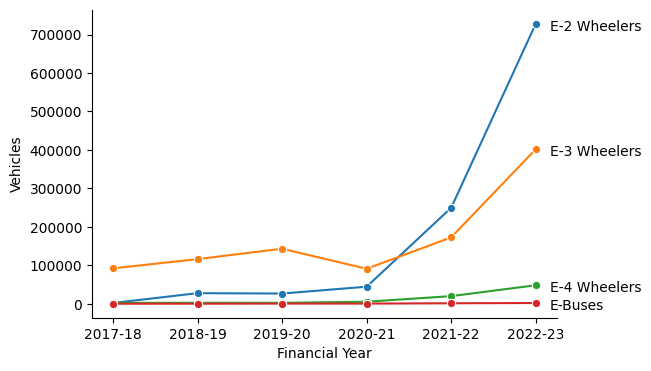

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=data['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

# Annotate the last data point
for col in data['EV Industries']['category'].unique():
    last_point = data['EV Industries'][data['EV Industries']['category'] == col].iloc[-1]
    plt.annotate(f"{last_point['category']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()

**The Above chart shows the growth of ev market in india**

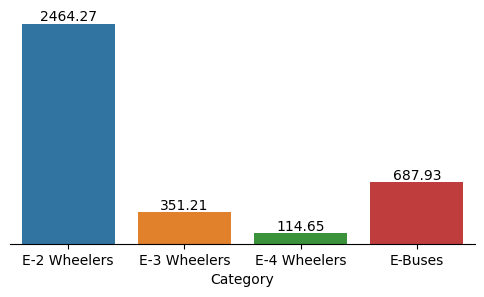

In [5]:
fig, ax = plt.subplots(figsize = (6, 3))
ax = sns.barplot(data['EV Market'], x = 'Category', y = 'Amount INR Cr')
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.ylabel("")
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.show()

**The Above chart shows that two wheelers ev is the emerging market in india which industry value of total 2464.27 cr Rupees.**

In [6]:
ev2w = list(data.keys())[0:4]
data_ev2w = pd.concat([data[ev2w[0]], data[ev2w[1]], data[ev2w[2]], data[ev2w[3]]])

In [7]:
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [8]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [9]:
data_ev2w['maker'] = data_ev2w['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')

In [10]:
data_ev2w

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083


In [11]:
data_ev2w_year = data_ev2w.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()

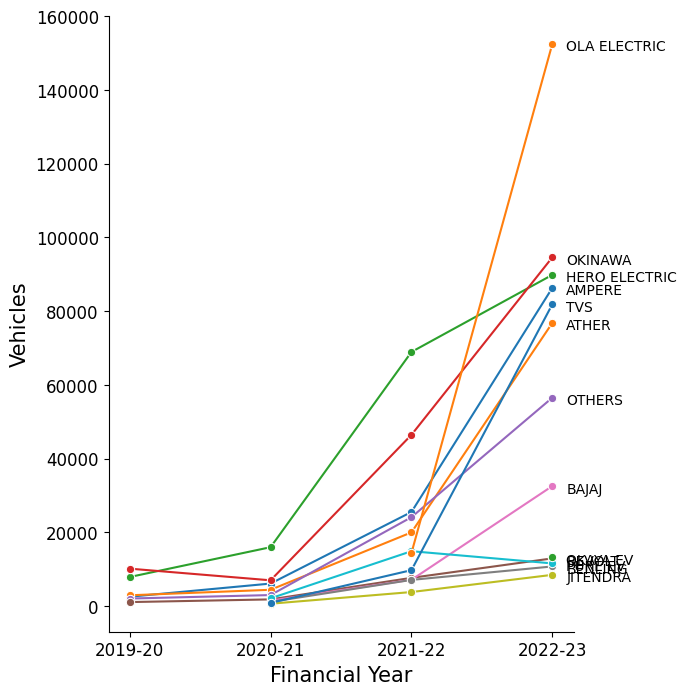

In [12]:
fig, ax = plt.subplots(figsize=(6,8))
ax = sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.xlabel("Financial Year", fontsize = 15)
plt.ylabel("Vehicles", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Maker')

# Annotate the last data point
for col in data_ev2w_year['maker'].unique()[::1]:
    last_point = data_ev2w_year[data_ev2w_year['maker'] == col].iloc[-1]
    plt.annotate(f"{last_point['maker']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.savefig('ev_2w.png', format = 'png')
plt.show()

# Conclusion

**From the above dataset evaluation and visualization, we can conclude that the EV market in India is growing day by day. The maximum market share of electric vehicles in India comes under the 2W market, with a value more than 2464.27 crore rupees. Also, we came to know that OLA Electric and Ather are leaders in the segment of 2W EVs in India.** 